In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler


Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load your 2014 crime dataset
df = pd.read_csv("../data/district_crime_2014.csv")
df.head()


,States/UTs,District,Year,Murder,Attempt to commit Murder,Culpable Homicide not amounting to Murder,Attempt to commit Culpable Homicide,Rape,Custodial Rape,Custodial_Gang Rape,...,Offences promoting enmity between different groups,Promoting enmity between different groups,"Imputation, assertions prejudicial to national integration",Extortion,Disclosure of Identity of Victims,Incidence of Rash Driving,HumanTrafficking,Unnatural Offence,Other IPC crimes,Total Cognizable IPC crimes
0,Andhra Pradesh,Anantapur,2014,134,171,8,0,35,0,0,...,0,0,0,0,0,1038,0,0,3800,8376
1,Andhra Pradesh,Chittoor,2014,84,170,2,0,32,0,0,...,0,0,0,19,0,249,0,0,2567,5374
2,Andhra Pradesh,Cuddapah,2014,80,162,1,0,28,0,0,...,0,0,0,0,0,948,0,0,2604,5803
3,Andhra Pradesh,East Godavari,2014,64,84,2,0,85,0,0,...,0,0,0,32,0,39,0,0,3791,7630
4,Andhra Pradesh,Guntakal Railway,2014,14,4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,37,490


In [3]:
df.info()
df.describe()
df.isnull().sum()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 91 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   States/UTs                                                        838 non-null    object
 1   District                                                          838 non-null    object
 2   Year                                                              838 non-null    int64 
 3   Murder                                                            838 non-null    int64 
 4   Attempt to commit Murder                                          838 non-null    int64 
 5   Culpable Homicide not amounting to Murder                         838 non-null    int64 
 6   Attempt to commit Culpable Homicide                               838 non-null    int64 
 7   Rape                                        

States/UTs                     0
District                       0
Year                           0
Murder                         0
Attempt to commit Murder       0
                              ..
Incidence of Rash Driving      0
HumanTrafficking               0
Unnatural Offence              0
Other IPC crimes               0
Total Cognizable IPC crimes    0
Length: 91, dtype: int64

In [4]:
df_clean = df.drop(['STATE/UT', 'DISTRICT'], axis=1)
df_clean.head()


KeyError: "['STATE/UT', 'DISTRICT'] not found in axis"

In [6]:
print(df.columns.tolist())



['States/UTs', 'District', 'Year', 'Murder', 'Attempt to commit Murder', 'Culpable Homicide not amounting to Murder', 'Attempt to commit Culpable Homicide', 'Rape', 'Custodial Rape', 'Custodial_Gang Rape', 'Custodial_Other Rape', 'Rape other than Custodial', 'Rape_Gang Rape', 'Rape_Others', 'Attempt to commit Rape', 'Kidnapping & Abduction_Total', 'Kidnapping & Abduction', 'Kidnapping & Abduction in order to Murder', 'Kidnapping for Ransom', 'Kidnapping & Abduction of Women to compel her for marriage', 'Other Kidnapping', 'Dacoity', 'Dacoity with Murder', 'Other Dacoity', 'Making Preparation and Assembly for committing Dacoity', 'Robbery', 'Criminal Trespass/Burglary', 'Criminal Trespass or Burglary', 'House Trespass & House Breaking', 'Theft', 'Auto Theft', 'Other Thefts', 'Unlawful Assembly', 'Riots', 'Riots_Communal', 'Riots_Industrial', 'Riots_Political', 'Riots_Caste Conflict', 'Riots_SC/STs Vs Non-SCs/STs', 'Riots_Other Caste Conflict', 'Riots_Agrarian', 'Riots_Students', 'Riots_

In [7]:
df_clean = df.drop(['States/UTs', 'District', 'Year'], axis=1)


In [8]:
df_clean = df_clean.dropna()


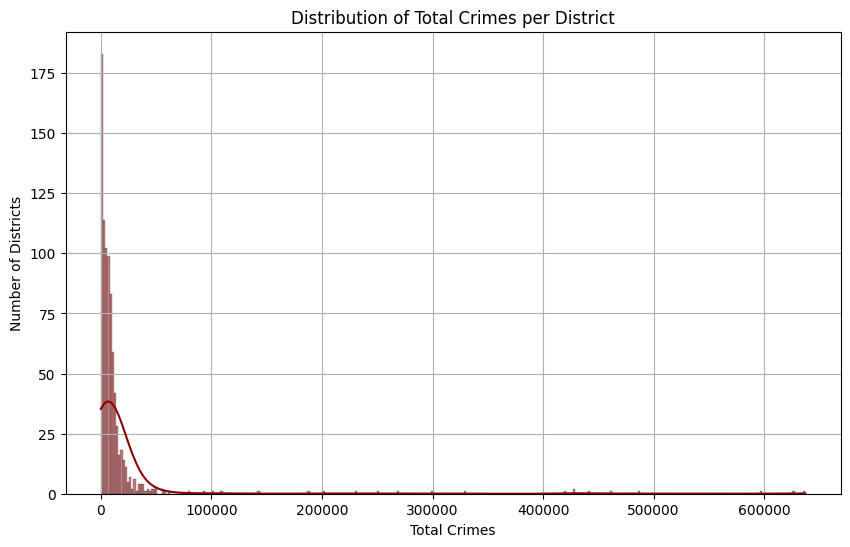

In [9]:
df['TOTAL_CRIMES'] = df_clean.sum(axis=1)

plt.figure(figsize=(10,6))
sns.histplot(df['TOTAL_CRIMES'], kde=True, color='darkred')
plt.title('Distribution of Total Crimes per District')
plt.xlabel('Total Crimes')
plt.ylabel('Number of Districts')
plt.grid(True)
plt.show()


In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)


In [11]:
pd.DataFrame(scaled_data).to_csv("../data/cleaned_crime_data.csv", index=False)


In [12]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [15]:
# Add cluster labels to original DataFrame
df['CLUSTER'] = kmeans.labels_
df.head()

,States/UTs,District,Year,Murder,Attempt to commit Murder,Culpable Homicide not amounting to Murder,Attempt to commit Culpable Homicide,Rape,Custodial Rape,Custodial_Gang Rape,...,"Imputation, assertions prejudicial to national integration",Extortion,Disclosure of Identity of Victims,Incidence of Rash Driving,HumanTrafficking,Unnatural Offence,Other IPC crimes,Total Cognizable IPC crimes,TOTAL_CRIMES,CLUSTER
0,Andhra Pradesh,Anantapur,2014,134,171,8,0,35,0,0,...,0,0,0,1038,0,0,3800,8376,19480,0
1,Andhra Pradesh,Chittoor,2014,84,170,2,0,32,0,0,...,0,19,0,249,0,0,2567,5374,12514,0
2,Andhra Pradesh,Cuddapah,2014,80,162,1,0,28,0,0,...,0,0,0,948,0,0,2604,5803,13271,0
3,Andhra Pradesh,East Godavari,2014,64,84,2,0,85,0,0,...,0,32,0,39,0,0,3791,7630,18112,0
4,Andhra Pradesh,Guntakal Railway,2014,14,4,0,0,0,0,0,...,0,0,0,1,0,0,37,490,1410,0


/var/folders/d9/f0ndrn1x0gj38fhvmrqnkjnr0000gn/T/ipykernel_92670/960635981.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CLUSTER', data=df, palette='Set2')


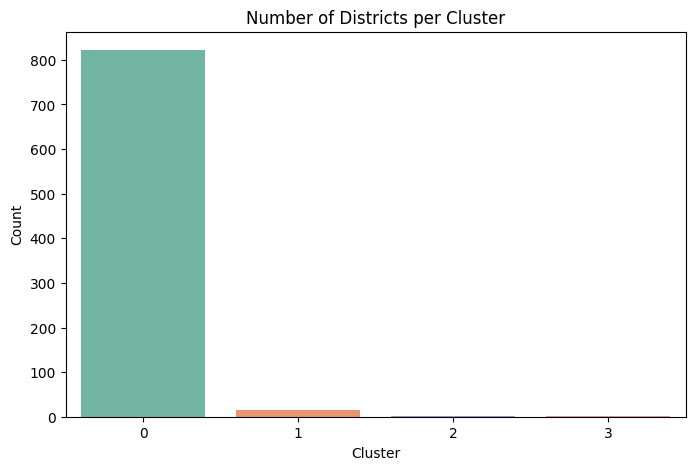

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='CLUSTER', data=df, palette='Set2')
plt.title("Number of Districts per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

In [17]:
cluster_summary = df.groupby('CLUSTER')['TOTAL_CRIMES'].agg(['count', 'mean', 'median', 'max'])
cluster_summary

,count,mean,median,max
CLUSTER,,,,
0,822,8970.023114,6083.5,141628
1,14,376312.714286,375125.0,637255
2,1,428743.000000,428743.0,428743
3,1,596720.000000,596720.0,596720


In [18]:
df.to_csv("../data/clustered_crime_data.csv", index=False)


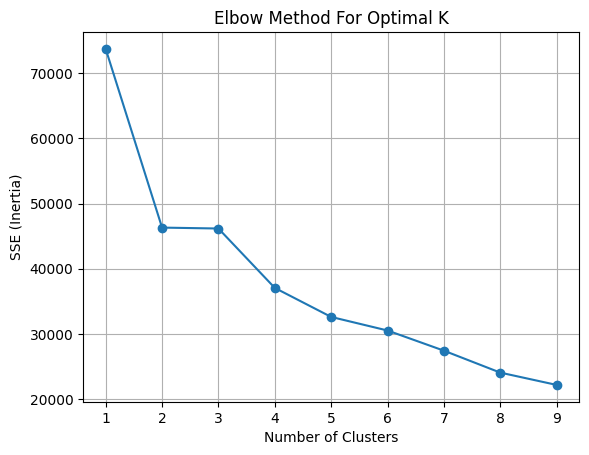

In [19]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method For Optimal K")
plt.grid(True)
plt.show()


In [20]:
sample_input = scaled_data[0].tolist()
print(sample_input)

[0.1738627949246319, 0.16917204139390346, 0.00013705414511818473, -0.14604309720129352, -0.16736541014914438, -0.07033611495158643, -0.07483314773547882, -0.06964649895602386, -0.1670463314250495, -0.18857189925945136, -0.16174346795870503, -0.1362600899659407, -0.08307170651454339, -0.19169235902303977, -0.11698366774325364, -0.24059292284902262, 0.03714233798227348, -0.05132256309183614, -0.09723312286241081, -0.17418012560085203, -0.09449344680907862, -0.14433201353683467, -0.1304621577574493, 0.1359122955533148, 0.14198097147183608, 0.10211996391201876, -0.06738045851518036, -0.10707946832691702, -0.035759572964457746, -0.1289116130120175, 0.07825109479488337, -0.14549189676874003, -0.08305020719296005, -0.13363933289960744, -0.16584007221174293, -0.13616520367264742, -0.15654851479982956, -0.13376682226305633, -0.10435470319295899, -0.06950917257922758, 0.10333880097567416, -0.1682557658316091, 0.03083887879640261, -0.15339758199905215, 0.2242784047997355, -0.052353698111355026, -

In [21]:
import pandas as pd
import numpy as np

# Load your scaled data
scaled = pd.read_csv("../data/cleaned_crime_data.csv").values

# Check shape to confirm
print(scaled.shape)

# Print rows belonging to cluster 1, 2, or 3
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, random_state=42)
model.fit(scaled)

# Predict clusters for all
labels = model.predict(scaled)

# Find an index with cluster 1, 2, or 3
for i, label in enumerate(labels):
    if label != 0:
        print(f"Index: {i}, Cluster: {label}")
        print(scaled[i].tolist())
        break


(838, 88)
Index: 20, Cluster: 1
[3.619042698042523, 3.4308756424828877, 0.8423804606114244, -0.1320435415555964, 2.536868752404769, -0.0703361149515864, -0.0748331477354788, -0.0696464989560238, 2.554586922750253, 0.2817353971078707, 2.7180770484947496, 2.2701260169730415, 1.1748854073176052, 0.9301710318678184, 0.0445725510584051, 0.7956171251923625, 0.5460472198934025, 1.9782594673061171, 1.3940702273100871, 0.7158378332620381, 1.3987440942249023, -0.1230004037760114, 0.7327607486865012, 4.274872947817063, 4.158689264248766, 4.090368892384171, 3.238042430493535, 2.150014162379212, 3.7799477209400463, 0.1937067292910889, 1.194916898994621, 0.3501268410044476, 0.1124443816488953, 4.028546970526081, 0.707343006411065, 2.9173874341807218, -0.1565485147998295, -0.1337668222630563, -0.1043547031929589, -0.0695091725792275, 1.0384894109704876, 4.271044257699026, 4.367546765983806, 0.9817145749642924, 6.68463256349967, 0.3722179052820208, -0.0692543361064443, 8.198360050425519, 5.28796283914